In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

import scipy.stats as stats
import pylab

from numpy import isnan
from sklearn.impute import KNNImputer

In [ ]:
pip install dtale

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
###Load Data###

from google.colab import files
uploaded = files.upload()

In [2]:
import io
data = pd.read_csv(r"C:\Users\91984\Downloads\Pharma_Bounce_Rate.csv")
# Dataset is now stored in a Pandas Dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     29 non-null     object 
 1   Patient_ID      29 non-null     int64  
 2   Specialisation  29 non-null     object 
 3   Dept            29 non-null     object 
 4   Dateofbill      29 non-null     object 
 5   Quantity        29 non-null     int64  
 6   ReturnQuantity  29 non-null     int64  
 7   Final_Cost      29 non-null     float64
 8   Final_Sales     29 non-null     float64
 9   RtnMRP          29 non-null     float64
 10  Formulation     28 non-null     object 
 11  DrugName        25 non-null     object 
 12  SubCat          25 non-null     object 
 13  SubCat1         25 non-null     object 
dtypes: float64(3), int64(3), object(8)
memory usage: 3.3+ KB


In [4]:
data.describe().round(2)

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,2.900000e+01,29.00,29.00,29.00,29.00,29.00
mean,1.201810e+10,2.17,0.38,149.03,364.02,18.70
std,1.632504e+04,3.73,1.52,244.14,800.43,65.89
min,1.201807e+10,0.00,0.00,40.34,0.00,0.00
25%,1.201808e+10,1.00,0.00,47.15,48.40,0.00
50%,1.201810e+10,1.00,0.00,49.96,81.10,0.00
75%,1.201811e+10,2.00,0.00,73.36,193.60,0.00
max,1.201812e+10,20.00,8.00,959.80,4004.21,330.29


In [5]:
"""##**Check for duplicates**"""

duplicate = data.duplicated()
duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [6]:
#Check for null values
data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       1
DrugName          4
SubCat            4
SubCat1           4
dtype: int64

In [7]:
#Check for shape
data.shape

(29, 14)

In [8]:
#Imputation by Mode for the critical columns
data['DrugName'] = data['DrugName'].fillna(data['DrugName'].mode()[0])

In [9]:
data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       1
DrugName          0
SubCat            4
SubCat1           4
dtype: int64

In [ ]:
"""##**Converting the datatype of Date column from Object to Datetime format**"""

data['Dateofbill'] = pd.to_datetime(data['Dateofbill'])

#Sorting the date column
#data = data.sort_values(by='Quantity')

In [ ]:
data

In [ ]:
data.sort_values(by='Quantity')

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data

In [ ]:
#autoeda
d = dtale.show(data)
d

In [10]:
# dropping Typeofsales and Patient_ID, since it is not required
data = data.drop(["Typeofsales", "Patient_ID"], axis =1)

In [11]:
data.shape

(29, 12)

In [ ]:
#data['DrugName'].value_counts().head(10).plot(kind = 'bar')

In [12]:
data = data[["Dateofbill","Quantity", "DrugName"]]

In [13]:
data.shape

(29, 3)

In [14]:
unique = data["DrugName"].value_counts()
unique

MULTIPLE ELECTROLYTES 500ML IVF                              7
PARACETAMOL 1GM IV INJ                                       2
SODIUM CHLORIDE 0.9%                                         2
SODIUM CHLORIDE IVF 100ML                                    2
N-ACETYLCYSTEINE 1000MG/5ML INJ                              1
POLYANTIBIOTIC RESISTANT BACILLUS CLAUSII 2BILLION SPORES    1
LIGNOCAINE HYDROCHLORIDE 2% INJ                              1
VITAMIN K 1ML INJ                                            1
PARACETAMOL 150MG                                            1
PROPOFOL 1% 20ML INJ                                         1
ZINC ACETATE 20MG/5ML SYP                                    1
CEFTAZIDIME 2GM+AVIBACTAM 500MG                              1
PEPTIDE BASED DIET POWDER                                    1
SODIUM BICARBONATE 8.5% INJ                                  1
FUROSEMIDE 10MG/ML                                           1
SALBUTAMOL 2.5MG                                       

In [15]:
data.sort_values(by='Quantity',ascending = False)

,Dateofbill,Quantity,DrugName
11,4-2-2022,20,N-ACETYLCYSTEINE 1000MG/5ML INJ
13,8/20/2022,8,PARACETAMOL 150MG
10,10-4-2022,3,MULTIPLE ELECTROLYTES 500ML IVF
24,2/13/2022,3,SODIUM CHLORIDE 0.9%
7,1-12-2022,3,SODIUM CHLORIDE IVF 100ML
8,8/24/2022,2,SODIUM BICARBONATE 8.5% INJ
17,9/17/2022,2,MULTIPLE ELECTROLYTES 500ML IVF
15,11/26/2022,2,MULTIPLE ELECTROLYTES 500ML IVF
19,10/14/2022,2,MULTIPLE ELECTROLYTES 500ML IVF
3,3/17/2022,2,WATER FOR INJECTION 10ML SOLUTION


In [16]:
# Making new Index
data = data.set_index('Dateofbill')
data.index = pd.to_datetime(data.index)
grouped_data = data.groupby('DrugName')

In [17]:
data

,Quantity,DrugName
Dateofbill,,
2022-06-01,1,ZINC ACETATE 20MG/5ML SYP
2022-07-23,1,CEFTAZIDIME 2GM+AVIBACTAM 500MG
2022-06-23,1,EPTIFIBATIDE 0.75MG/ML
2022-03-17,2,WATER FOR INJECTION 10ML SOLUTION
2022-12-21,1,LORAZEPAM 1MG
2022-07-15,0,SALBUTAMOL 2.5MG
2022-05-22,1,FUROSEMIDE 10MG/ML
2022-01-12,3,SODIUM CHLORIDE IVF 100ML
2022-08-24,2,SODIUM BICARBONATE 8.5% INJ


In [18]:
grouped_data

In [19]:
# Forecasting For Top 5 drugs (Only 4 possible)

A = grouped_data.get_group('MULTIPLE ELECTROLYTES 500ML IVF')
A1 = grouped_data.get_group('SODIUM CHLORIDE 0.9%')
A2 = grouped_data.get_group('SODIUM CHLORIDE IVF 100ML')
#A3 = grouped_data.get_group('PARACETAMOL 1GM IV INJ ')
#A4 = grouped_data.get_group('LIGNOCAINE HYDROCHLORIDE 2% INJ')

In [20]:
A

,Quantity,DrugName
Dateofbill,,
2022-10-04,3,MULTIPLE ELECTROLYTES 500ML IVF
2022-11-26,2,MULTIPLE ELECTROLYTES 500ML IVF
2022-09-07,1,MULTIPLE ELECTROLYTES 500ML IVF
2022-09-17,2,MULTIPLE ELECTROLYTES 500ML IVF
2022-10-14,2,MULTIPLE ELECTROLYTES 500ML IVF
2022-09-17,0,MULTIPLE ELECTROLYTES 500ML IVF
2022-11-07,1,MULTIPLE ELECTROLYTES 500ML IVF


C:\Users\91984\AppData\Local\Temp\ipykernel_18644\2837046202.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Dateofbill'>

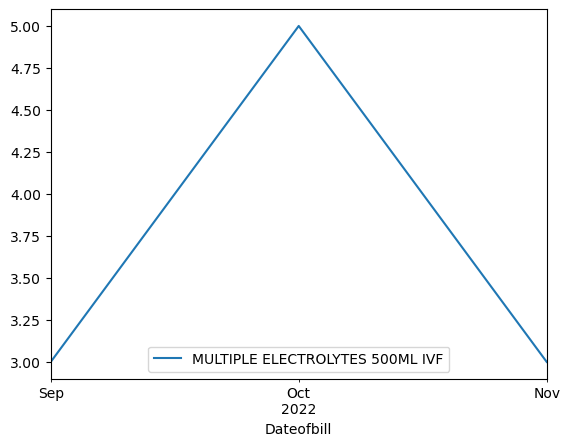

In [21]:
A = A[["Quantity"]]
A.rename(columns = {"Quantity" : "MULTIPLE ELECTROLYTES 500ML IVF"}, inplace=True)
A = A.resample('M').sum()
A.plot()

In [22]:
A1

,Quantity,DrugName
Dateofbill,,
2022-12-19,0,SODIUM CHLORIDE 0.9%
2022-02-13,3,SODIUM CHLORIDE 0.9%


C:\Users\91984\AppData\Local\Temp\ipykernel_18644\1858332605.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Dateofbill'>

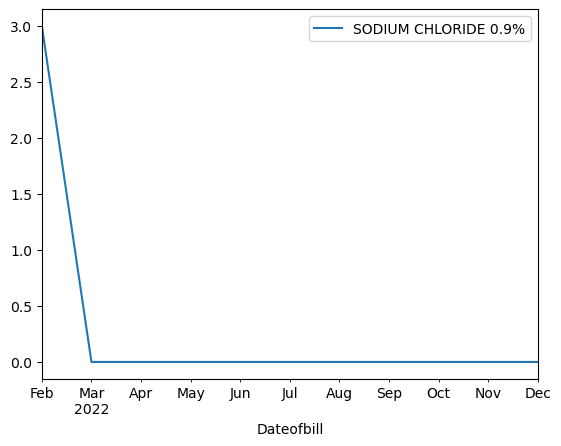

In [23]:
A1 = A1[["Quantity"]]
A1.rename(columns = {"Quantity" : "SODIUM CHLORIDE 0.9%"}, inplace=True)
A1 = A1.resample('M').sum()
A1.plot()

In [24]:
A2

,Quantity,DrugName
Dateofbill,,
2022-01-12,3,SODIUM CHLORIDE IVF 100ML
2022-08-11,1,SODIUM CHLORIDE IVF 100ML


C:\Users\91984\AppData\Local\Temp\ipykernel_18644\1481419524.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Dateofbill'>

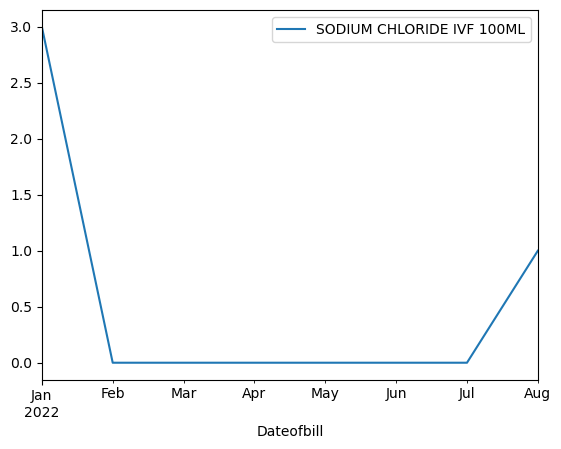

In [25]:
A2 = A2[["Quantity"]]
A2.rename(columns = {"Quantity" : "SODIUM CHLORIDE IVF 100ML"}, inplace=True)
A2 = A2.resample('M').sum()
A2.plot()

In [ ]:
#A3

In [ ]:
'''
A3 = A3[["Quantity"]]
A3.rename(columns = {"Quantity" : "SODIUM CHLORIDE 0.9%"}, inplace=True)
A3 = A3.resample('M').sum()
A3.plot()
'''

In [ ]:
#A4

In [ ]:
'''
A4 = A4[["Quantity"]]
A4.rename(columns = {"Quantity" : "MULTIPLE ELECTROLYTES 500ML IVF"}, inplace=True)
A4 = A4.resample('M').sum()
A4.plot()
'''

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adf_test(A)

ValueError: sample size is too short to use selected regression component

In [30]:
adf_test(A1)

ADF Statistics: -3.2225135712778084e+16
p- value: 0.0
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


C:\Users\91984\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning:

divide by zero encountered in log



In [31]:
adf_test(A2)

ADF Statistics: -7.181324987175316
p- value: 2.645211058164923e-10
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [32]:
def decompose(df):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    # result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend = 'freq',  period=1)
    result_add = seasonal_decompose(df, model = 'additive', extrapolate_trend='freq',  period=1)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return  result_add

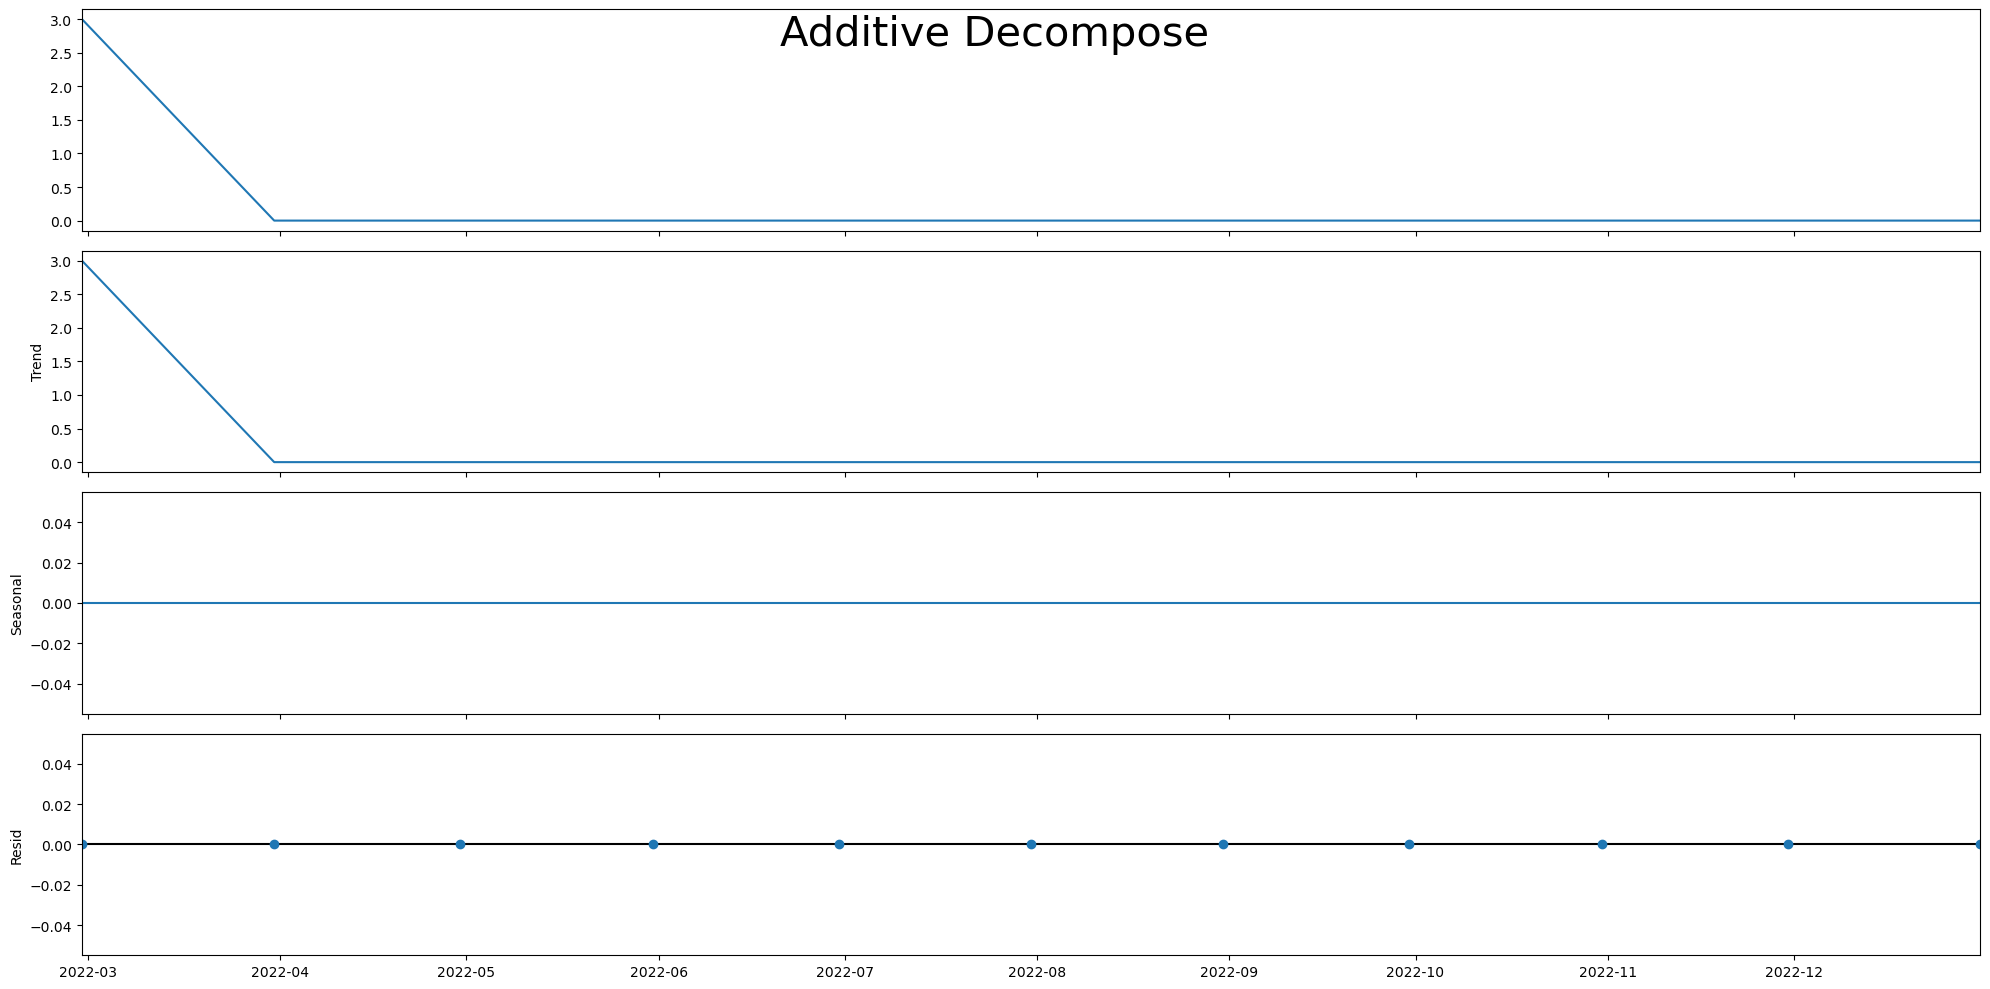

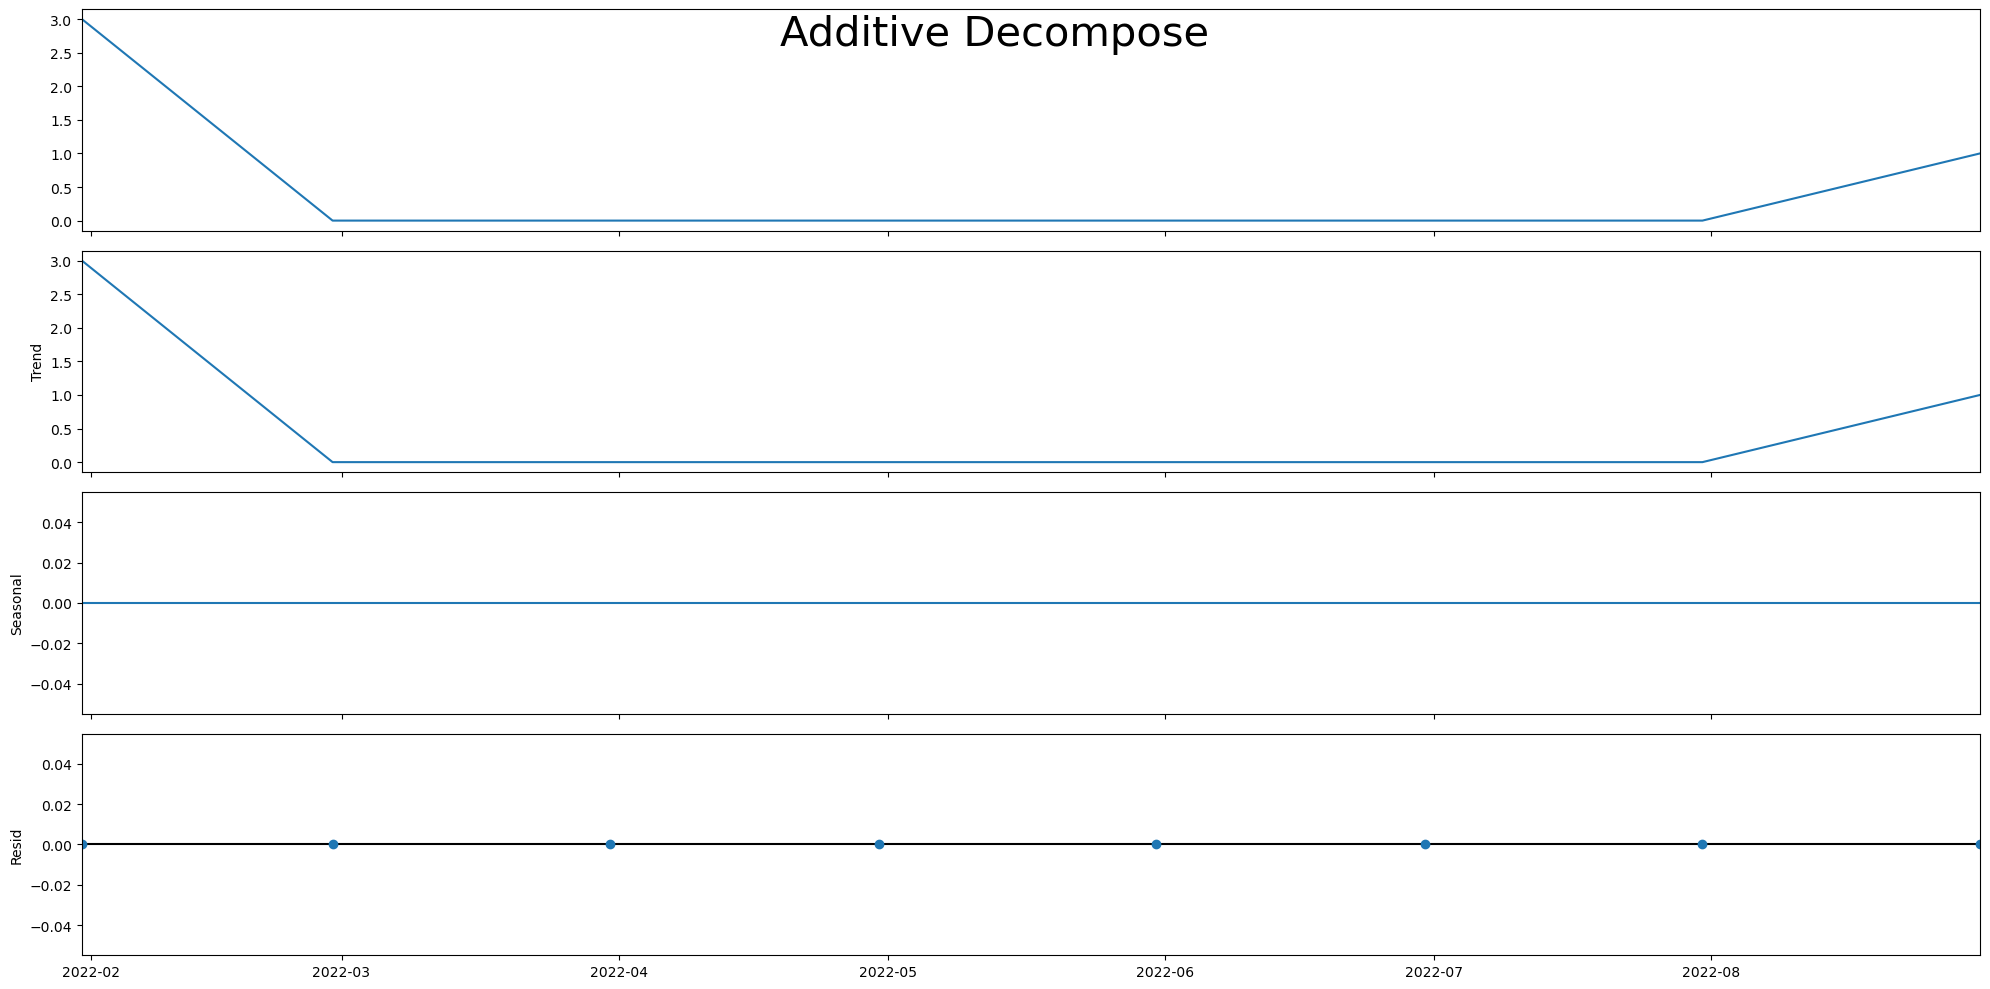

In [33]:
decompose(A1)
decompose(A2)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

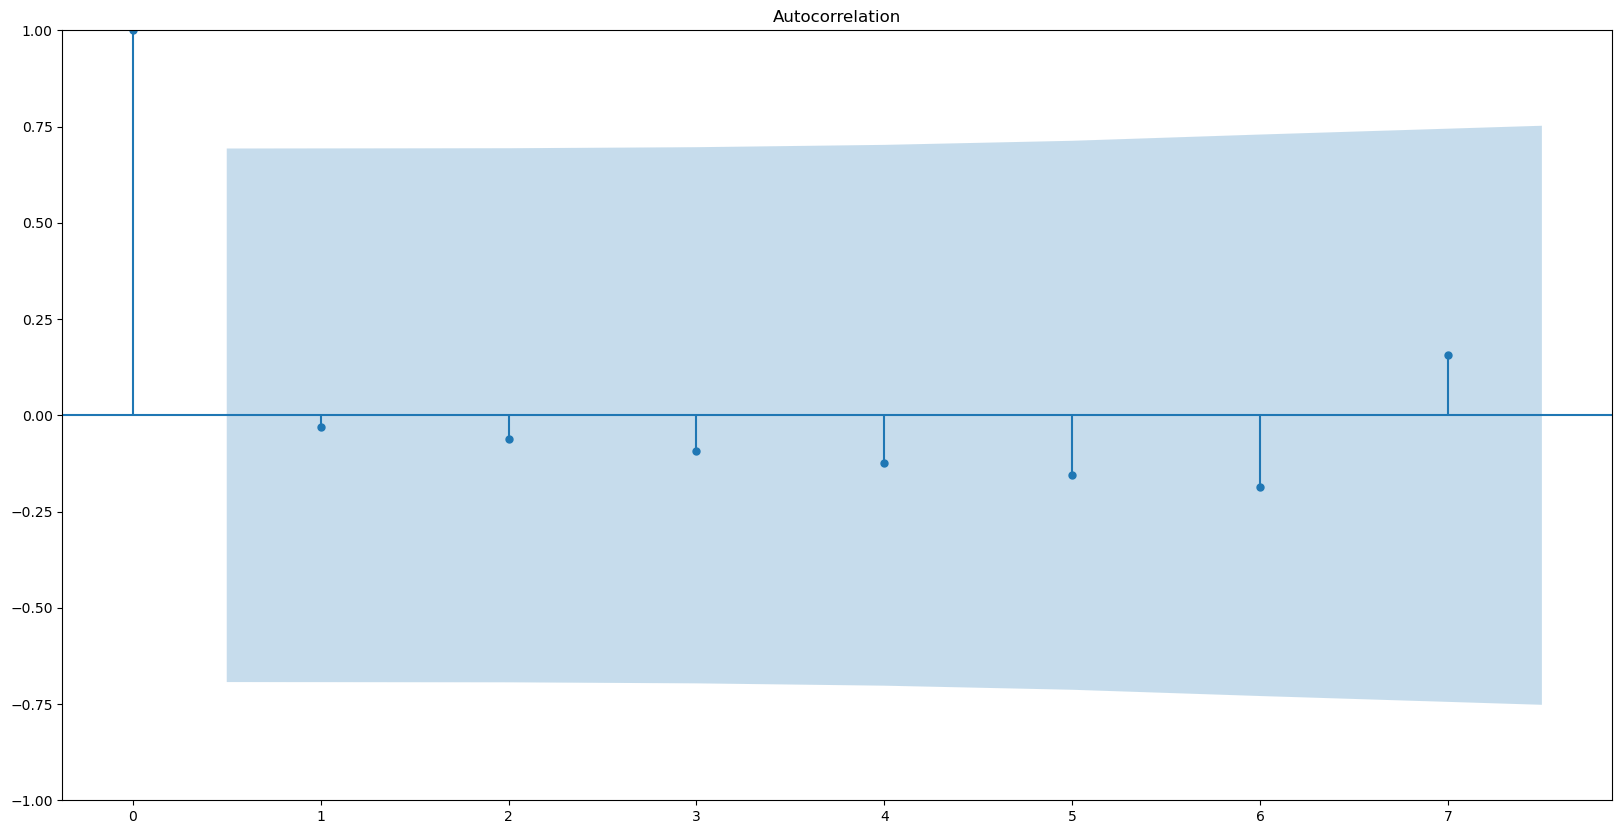

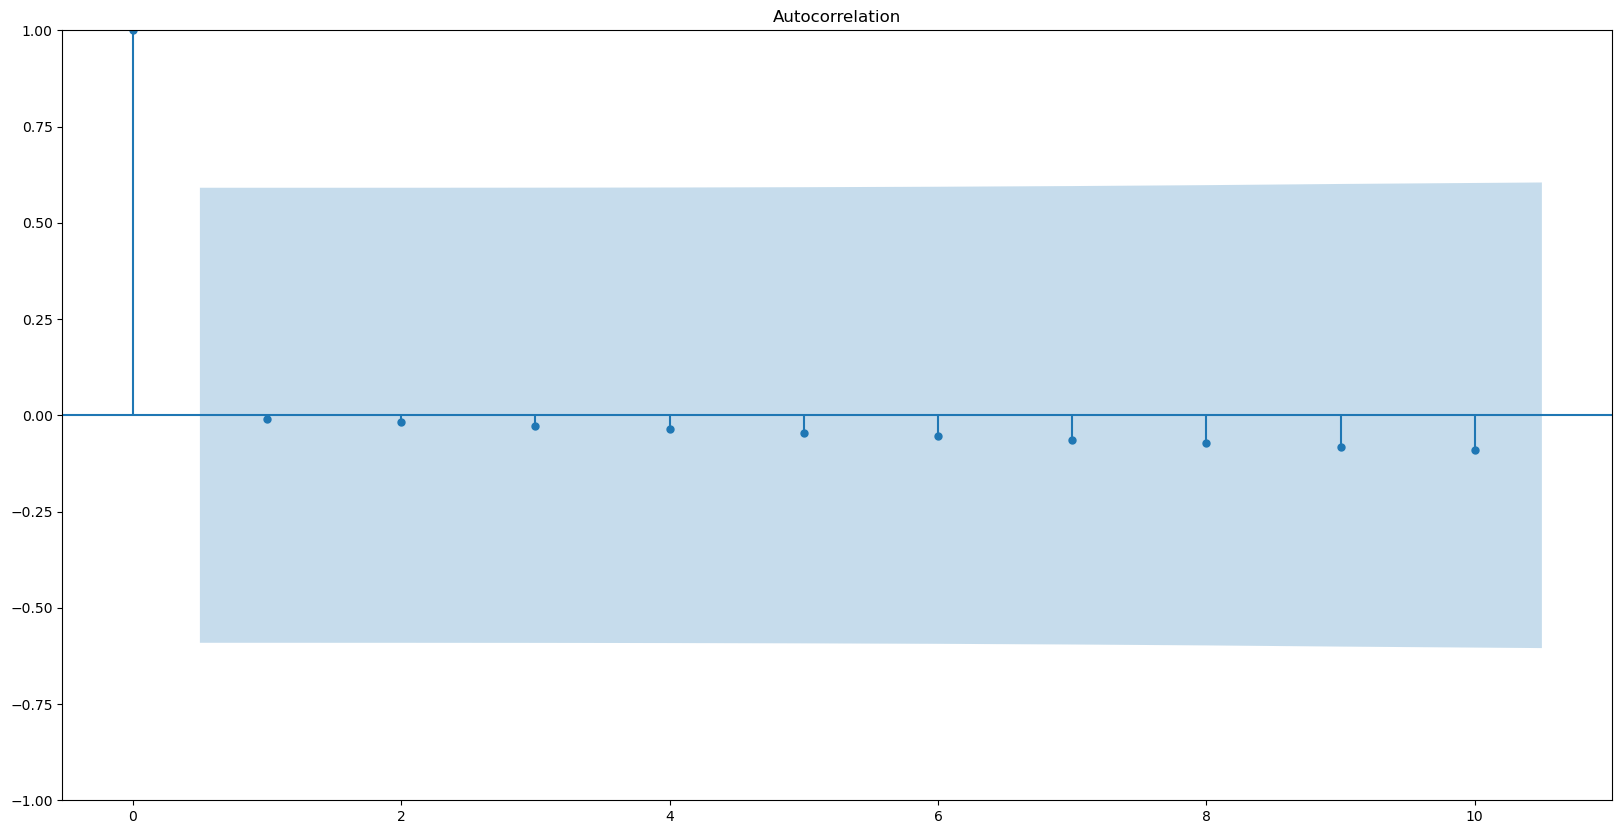

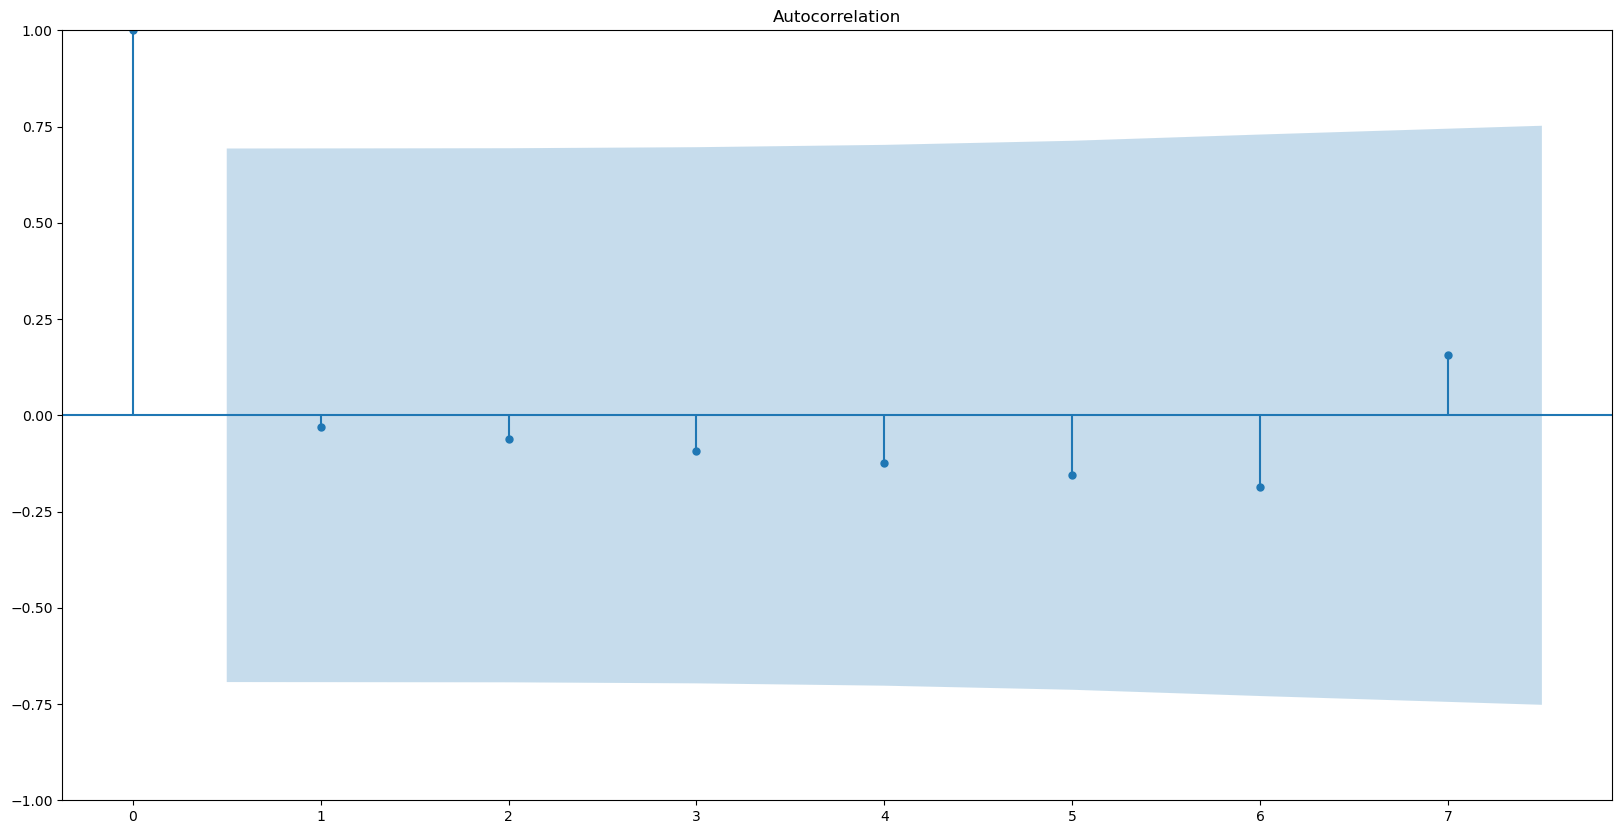

In [35]:
# ACF plots
plot_acf(A1)  # 1
plot_acf(A2) # 4


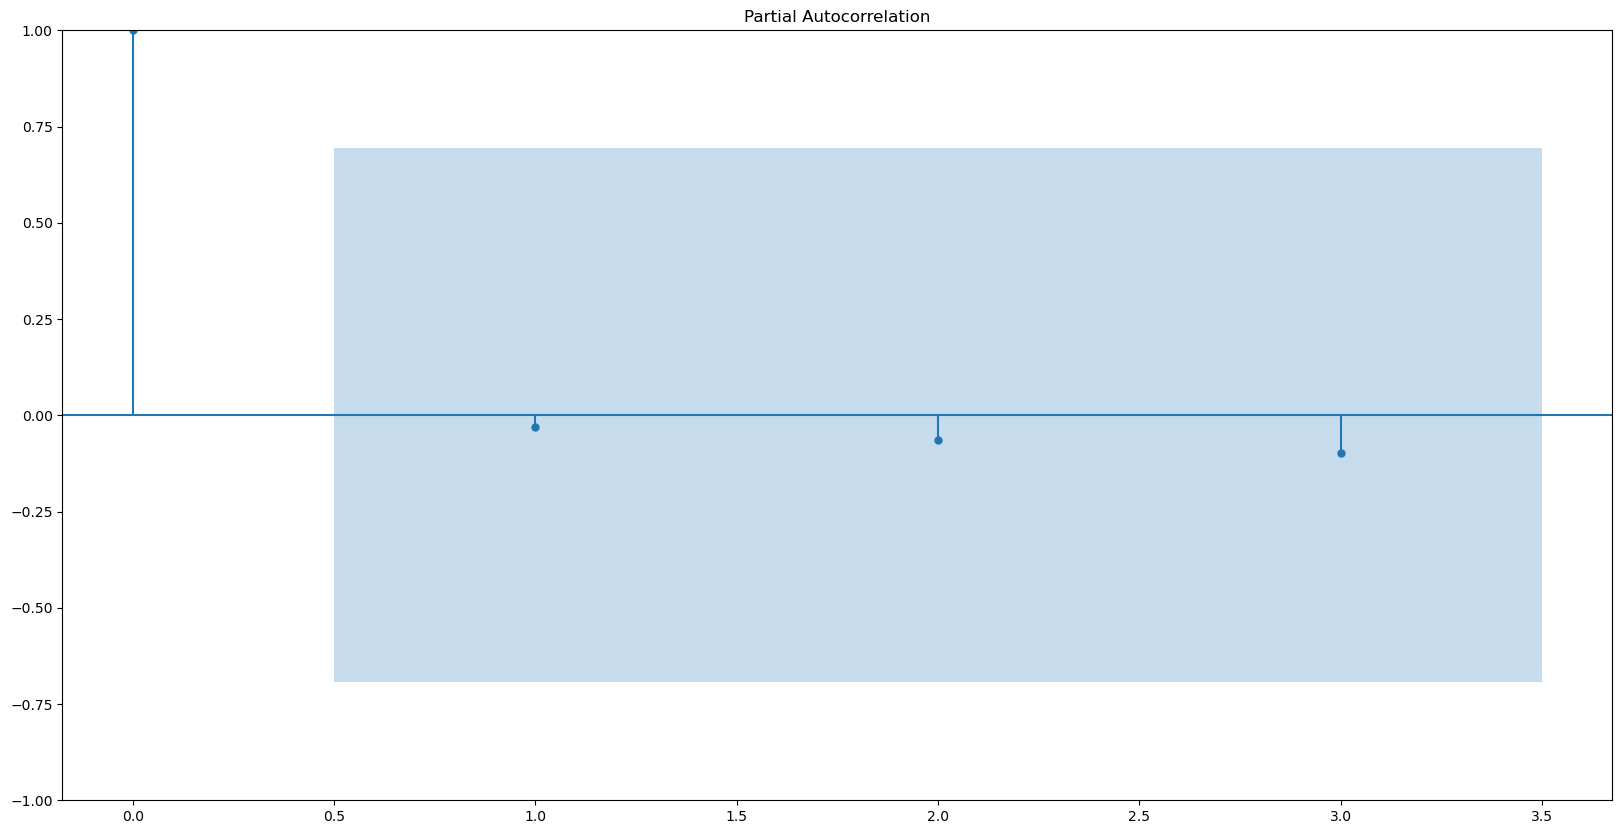

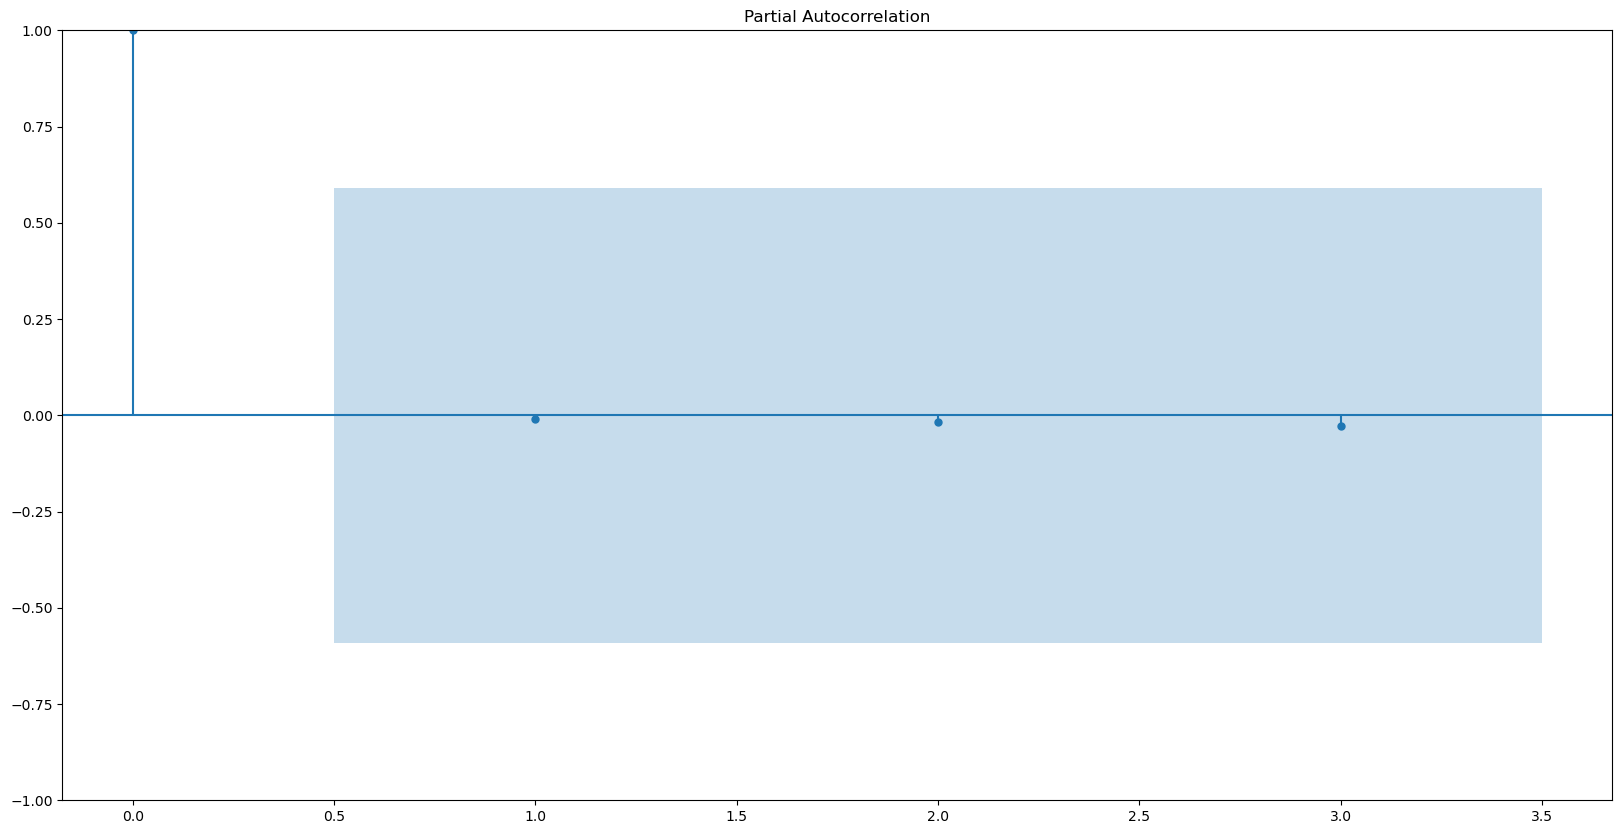

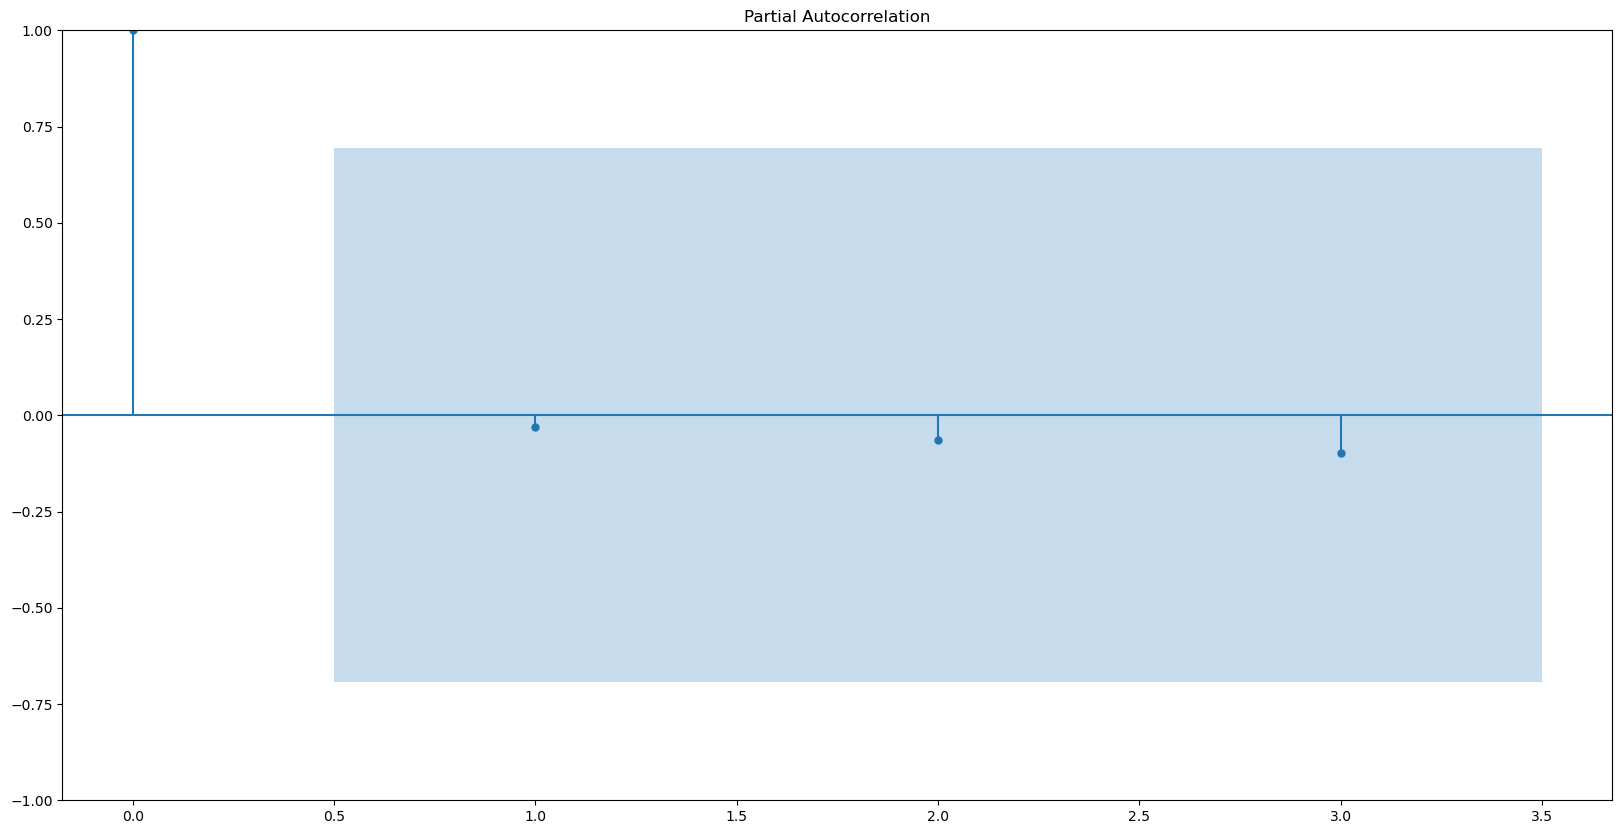

In [37]:
# pcf plots
plot_pacf(A1 , lags = 3)  # 1
plot_pacf(A2 , lags = 3) # 1

In [38]:
# Creating a function to calculate the MAPE value for test data
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [41]:
# Auto Arima
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
pip install pmdarima

  Using cached pmdarima-2.0.3-cp311-cp311-win_amd64.whl (566 kB)
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/ea/8f/216de5d7bede3e26a7131b427a8aadade032f03f9c8ee88792def02e2cf4/Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached Cython-3.0.2-cp311-cp311-win_amd64.whl (2.8 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [42]:
Am1 = auto_arima(A1, suppress_warnings=True)
Am1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:                        SARIMAX   Log Likelihood                 -14.505
Date:                Thu, 28 Sep 2023   AIC                             31.009
Time:                        09:33:55   BIC                             31.407
Sample:                    02-28-2022   HQIC                            30.758
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8182      0.156      5.244      0.000       0.512       1.124
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                31.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
Am2 = auto_arima(A2, suppress_warnings=True)
Am2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                        SARIMAX   Log Likelihood                 -12.244
Date:                Thu, 28 Sep 2023   AIC                             26.488
Time:                        09:34:01   BIC                             26.568
Sample:                    01-31-2022   HQIC                            25.952
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2500      0.375      3.335      0.001       0.515       1.985
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.94
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               0.11   Skew:                             1.88
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
################
# SODIUM CHLORIDE 0.9%
Drug1=ARIMA(A1,order=(1, 1, 12))
Drug1=Drug1.fit()
Drug1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     SODIUM CHLORIDE 0.9%   No. Observations:                   11
Model:                  ARIMA(1, 1, 12)   Log Likelihood                 -13.663
Date:                  Thu, 28 Sep 2023   AIC                             55.325
Time:                          09:35:35   BIC                             59.561
Sample:                      02-28-2022   HQIC                            50.678
                           - 12-31-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.637e-06   6.25e+04   1.54e-10      1.000   -1.22e+05    1.22e+05
ma.L1      -1.054e-05   6.25e+04  -1.69e-10      1.000   -1.22e+05    1.22e+05
ma.L2       -4.91e-06   2.07e+04  -2.37e-10      1.000   -4.05e+04    4.05e+04
ma.L3      -4.906e-06   2.07e+04  -2.37e-10      1.000   -4.06e+04    4.06e+04
ma.L4      -4.902e-06   2.07e+04  -2.37e-10      1.000   -4.06e+04    4.06e+04
ma.L5      -4.898e-06   2.07e+04  -2.36e-10      1.000   -4.06e+04    4.06e+04
ma.L6      -4.877e-06   2.08e+04  -2.34e-10      1.000   -4.08e+04    4.08e+04
ma.L7      -4.877e-06   2.08e+04  -2.34e-10      1.000   -4.08e+04    4.08e+04
ma.L8      -4.877e-06   2.08e+04  -2.34e-10      1.000   -4.08e+04    4.08e+04
ma.L9      -4.877e-06   2.08e+04  -2.34e-10      1.000   -4.08e+04    4.08e+04
ma.L10     -1.606e-06      0.589  -2.73e-06      1.000      -1.155       1.155
ma.L11     -1.606e-06      0.429  -3.74e-06      1.000      -0.841       0.841
ma.L12     -1.606e-06      0.344  -4.68e-06      1.000      -0.673       0.673
sigma2         0.9000      0.899      1.002      0.317      -0.861       2.661
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.3e+26. Standard errors may be unstable.
"""

<Axes: >

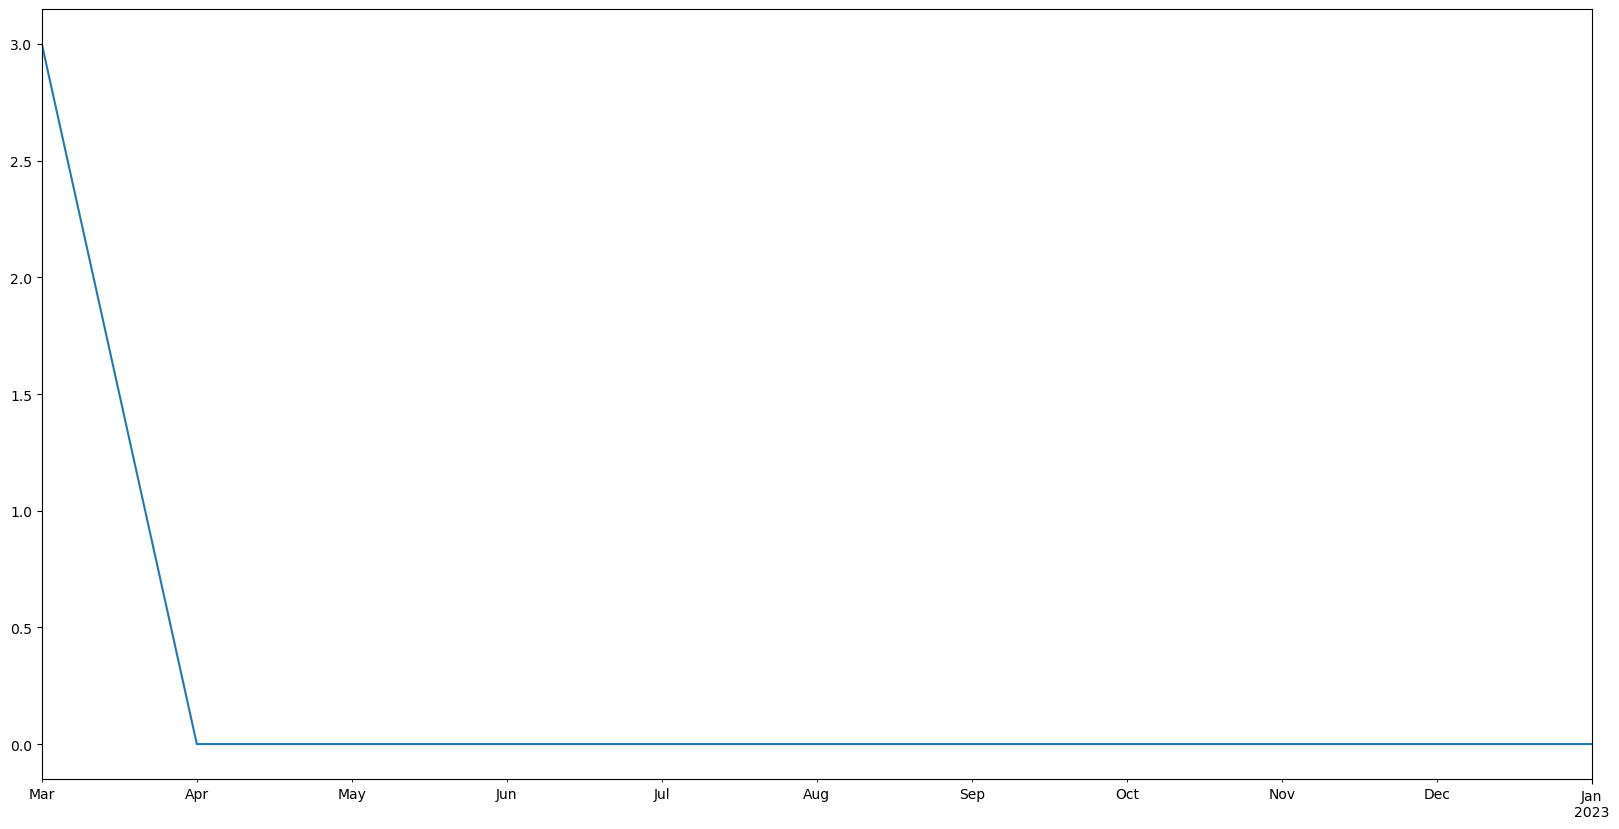

In [48]:
pred=Drug1.predict(start=1,end=11, typ='levels').rename('ARIMA predictions')
pred.plot()


In [49]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(A1['SODIUM CHLORIDE 0.9%'], pred)


51136879715.12898

In [50]:
predf=Drug1.predict(start=12,end=24,typ='levels').rename('ARIMA predictions')
predf
Drug1.save('drug_1.pkl')

In [51]:
# SODIUM CHLORIDE IVF 100ML #
Drug2 = ARIMA(A2,order=(4, 1, 12))
Drug2 = Drug2.fit()
Drug2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     SODIUM CHLORIDE IVF 100ML   No. Observations:                    8
Model:                       ARIMA(4, 1, 12)   Log Likelihood                 -10.743
Date:                       Thu, 28 Sep 2023   AIC                             55.486
Time:                               09:42:33   BIC                             54.566
Sample:                           01-31-2022   HQIC                            44.121
                                - 08-31-2022                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.455e-06   1.22e+04   4.48e-10      1.000   -2.39e+04    2.39e+04
ar.L2       1.086e-05   2.02e+05   5.36e-11      1.000   -3.97e+05    3.97e+05
ar.L3       1.715e-06   6.21e+04   2.76e-11      1.000   -1.22e+05    1.22e+05
ar.L4       9.988e-06   8.02e+04   1.24e-10      1.000   -1.57e+05    1.57e+05
ma.L1      -1.953e-05   1.62e+04   -1.2e-09      1.000   -3.18e+04    3.18e+04
ma.L2      -1.405e-05   1.66e+05  -8.45e-11      1.000   -3.26e+05    3.26e+05
ma.L3        -5.4e-06   5.12e+04  -1.06e-10      1.000      -1e+05       1e+05
ma.L4      -1.264e-05   7.21e+04  -1.75e-10      1.000   -1.41e+05    1.41e+05
ma.L5      -5.828e-06   4.96e+04  -1.18e-10      1.000   -9.72e+04    9.72e+04
ma.L6         -0.4182   1.57e+05  -2.67e-06      1.000   -3.07e+05    3.07e+05
ma.L7       8.459e-06   2.01e+04   4.21e-10      1.000   -3.94e+04    3.94e+04
ma.L8      -9.811e-07   7.85e+04  -1.25e-11      1.000   -1.54e+05    1.54e+05
ma.L9       3.226e-06   3.36e+04   9.62e-11      1.000   -6.58e+04    6.58e+04
ma.L10     -5.875e-06   4.04e+04  -1.45e-10      1.000   -7.92e+04    7.92e+04
ma.L11     -8.864e-06   2.53e+04  -3.51e-10      1.000   -4.95e+04    4.95e+04
ma.L12         0.0976   8.57e+04   1.14e-06      1.000   -1.68e+05    1.68e+05
sigma2         1.0893   1.36e+05   8.01e-06      1.000   -2.67e+05    2.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.12
Prob(Q):                              0.93   Prob(JB):                         0.05
Heteroskedasticity (H):               0.00   Skew:                            -2.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.48e+18. Standard errors may be unstable.
"""

<Axes: xlabel='Dateofbill'>

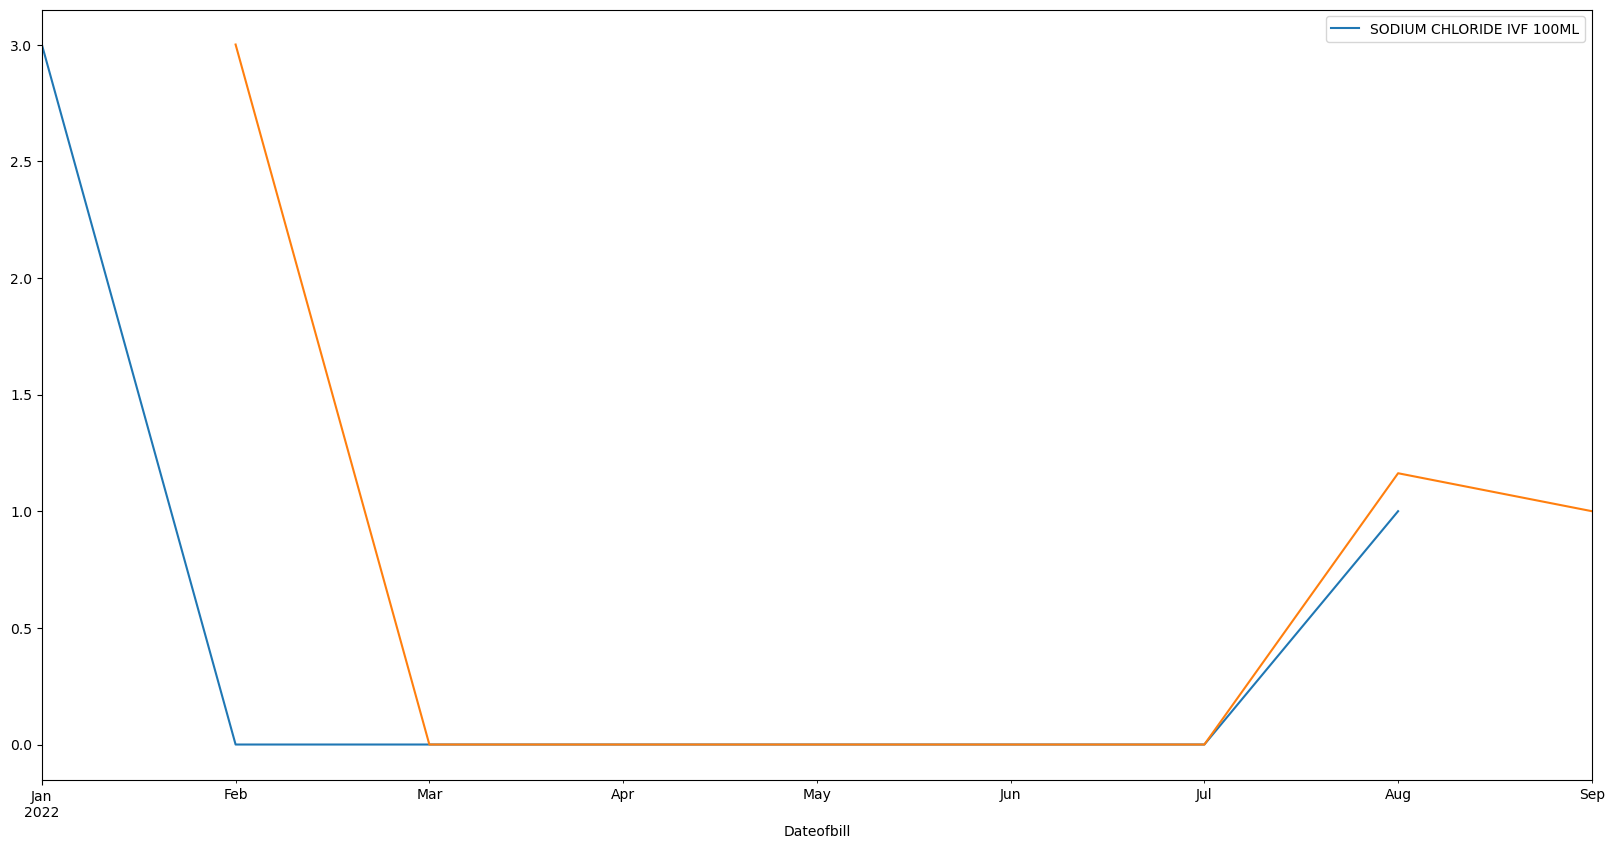

In [55]:
A2.plot()
pred=Drug2.predict(start=1,end=8, typ='levels').rename('ARIMA predictions')
pred.plot()

In [56]:
mean_absolute_percentage_error(A2['SODIUM CHLORIDE IVF 100ML'], pred)
predf=Drug2.predict(start=11,end=24,typ='levels').rename('ARIMA predictions')
predf
Drug2.save('drug_2.pkl')

In [57]:
import statsmodels.api as sm
model1 = sm.load('drug_1.pkl')
model2 = sm.load('drug_2.pkl')

In [58]:
predf1=model1.predict(start=12,end=24).rename('ARIMA predictions')
predf1


2023-02-28    0.000010
2023-03-31    0.000014
2023-04-30    0.000014
2023-05-31    0.000014
2023-06-30    0.000014
2023-07-31    0.000014
2023-08-31    0.000014
2023-09-30    0.000014
2023-10-31    0.000014
2023-11-30    0.000014
2023-12-31    0.000014
2024-01-31    0.000014
2024-02-29    0.000014
Freq: M, Name: ARIMA predictions, dtype: float64

In [59]:
predf2=model2.predict(start=12,end=24).rename('ARIMA predictions')
predf2

2023-01-31    1.000066
2023-02-28    0.820858
2023-03-31    0.820853
2023-04-30    0.820851
2023-05-31    0.820850
2023-06-30    0.820849
2023-07-31    0.820852
2023-08-31    0.805077
2023-09-30    0.805077
2023-10-31    0.805077
2023-11-30    0.805077
2023-12-31    0.805077
2024-01-31    0.805077
Freq: M, Name: ARIMA predictions, dtype: float64